In [1]:
import os

path = os.getcwd()
print(path)

/Users/xyoojk/Desktop/matplotlib-challenge/Pymaceuticals


In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_df = pd.read_csv("../Pymaceuticals/mouse_drug_data_new.csv")
clinical_df = pd.read_csv("../Pymaceuticals/clinicaltrial_data_new.csv")


# # Read the Mouse and Drug Data and the Clinical Trial Data
pd.set_option('display.max_rows', 999)
clinical_df.head(), mouse_df.head()

# Combine the data into a single dataset
combined_drug_clinical_data = pd.merge(clinical_df, mouse_df, how='left', on='Mouse ID')
combined_drug_clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


Tumor Response to Treatment

In [3]:
import statistics
from statistics import mean, median, mode

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_grouped = combined_drug_clinical_data.groupby(['Drug', 'Timepoint'])

# Convert to DataFrame
tumor_volume_mean_df = mean_tumor_volume_grouped["Tumor Volume (mm3)"].mean()

# tumor_mean_df.head()
tumor_volume_mean_df.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [5]:
mean_tumor_volume_df = pd.DataFrame({"Tumor Volume": tumor_volume_mean_df})
mean_tumor_volume_df.reset_index().head()

,Drug,Timepoint,Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_standard_error = mean_tumor_volume_grouped["Tumor Volume (mm3)"].sem()
tumor_volume_standard_error

# Convert to DataFrame
tumor_volume_standard_error_df = pd.DataFrame({"Tumor Volume": tumor_volume_standard_error})

# Preview DataFrame
tumor_volume_standard_error_df.reset_index().head()

,Drug,Timepoint,Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [7]:
# Minor Data Munging to Re-Format the Data Frames
tumor_volume_minor_munging_df = mean_tumor_volume_df.pivot_table("Tumor Volume", ["Timepoint"], "Drug")

# Preview that Reformatting worked
tumor_volume_minor_munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


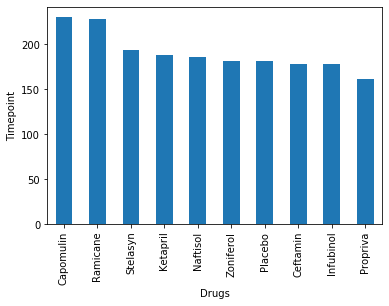

In [32]:
drug_counts = combined_drug_clinical_data["Drug"].value_counts()
drug_counts.plot(kind="bar")

plt.xlabel("Drugs")
plt.ylabel("Timepoint")

plt.xticks(rotation=90)
plt.show()

In [9]:
# Generate the Plot (with Error Bars)

# Save the Figure
plt.savefig("Tumor_volume.png")

In [10]:
 # Show the Figure
plt.show()

 Metastatic Response to Treatment

In [11]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_site_grouped = combined_drug_clinical_data.groupby(['Drug', 'Timepoint'])
# Convert to DataFrame
met_site_df = met_site_grouped["Metastatic Sites"].mean()
# Preview DataFrame
met_site_df.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [12]:
metastatic_sites_df = pd.DataFrame({"Metastatic Sites": met_site_df})
metastatic_sites_df.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [13]:
 # Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_site_standard_error = met_site_grouped["Metastatic Sites"].sem()
met_site_standard_error
# Convert to DataFrame
met_site_standard_error_df = pd.DataFrame({"Metastatic Sites": met_site_standard_error})
# Preview DataFrame
met_site_standard_error_df.reset_index().head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [14]:
 # Minor Data Munging to Re-Format the Data Frames
met_site_minor_munging_df = metastatic_sites_df.pivot_table("Metastatic Sites", ["Timepoint"], "Drug")
    
# Preview that Reformatting worked
met_site_minor_munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


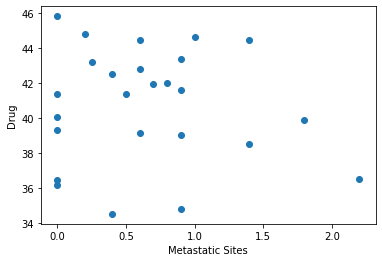

In [15]:
 # Generate the Plot (with Error Bars)
met_plt = combined_drug_clinical_data.loc[combined_drug_clinical_data[("Drug")]=="Capomulin"]
met_group = met_plt.groupby(["Mouse ID"]).mean()
plt.scatter(met_group["Metastatic Sites"], met_group["Tumor Volume (mm3)"])
plt.xlabel("Metastatic Sites")
plt.ylabel("Drug")

plt.savefig("Metastatic_sites.png")

plt.show()

Survival Rates

In [16]:
 # Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_id_grouped = combined_drug_clinical_data.groupby(['Drug', 'Timepoint'])
    
# # Convert to DataFrame
mouse_id_df = mouse_id_grouped["Mouse ID"].count()

# # Preview DataFrame
mouse_id_df.head()

Drug       Timepoint
Capomulin  0            25
           5            25
           10           25
           15           24
           20           23
Name: Mouse ID, dtype: int64

In [17]:
mouse_id_df = pd.DataFrame({"Mice Count": mouse_id_df})
mouse_id_df.reset_index().head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames
mouse_id_munging_df = mouse_id_df.pivot_table("Mice Count", ["Timepoint"], "Drug")
# Preview the Data Frame
mouse_id_munging_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


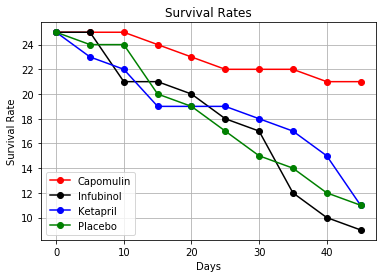

In [19]:
 # Generate the Plot (Accounting for percentages)
time = [0,5,10,15,20,25,30,35,40,45]

capo = mouse_id_munging_df["Capomulin"]
infu = mouse_id_munging_df["Infubinol"]
keta = mouse_id_munging_df["Ketapril"]
Placebo = mouse_id_munging_df["Placebo"]

plt.plot(time,capo, marker = "o", color= "red", label="Capomulin")
plt.plot(time,infu, marker = "o", color= "black", label="Infubinol")
plt.plot(time,keta, marker = "o", color= "blue", label="Ketapril")
plt.plot(time,Placebo, marker = "o", color= "green", label="Placebo")

plt.legend(loc="best")
plt.title("Survival Rates")
plt.xlabel("Days")
plt.ylabel("Survival Rate")
plt.grid()

plt.savefig("Survival_Rate.png")
plt.show()

 Summary Bar Graph

In [28]:
# Calculate the percent changes for each drug
percent_change_begin = mouse_id_munging_df.iloc[0]
percent_change_end = mouse_id_munging_df.iloc[-1]

percent_change = ((percent_change_end - percent_change_begin)/percent_change_begin)*100
# Display the data to confirm
percent_change

percent_change_df = pd.DataFrame ({"Percent Change": percent_change})
percent_change_df

,Percent Change
Drug,
Capomulin,-16.000000
Ceftamin,-48.000000
Infubinol,-64.000000
Ketapril,-56.000000
Naftisol,-48.000000
Placebo,-56.000000
Propriva,-73.076923
Ramicane,-20.000000
Stelasyn,-57.692308


In [30]:
percent_change_bar = pd.DataFrame({("Passing," "Percent Change"):
                                  {("Capomulin"): -16.00,
                                   ("Ceftamin"): -48.00,
                                   ("Infubinol"): -64.00,
                                   ("Ketapril"): -56.00,
                                   ("Naftisol"): -48.00,
                                   ("Placebo"): -56.00,
                                   ("Propriva"): -73.08,
                                   ("Ramicane"): -20.00,
                                   ("Stelasyn"): -57.69,
                                   ("Zoniferol"): -44.00}})
percent_change_bar

,"Passing,Percent Change"
Capomulin,-16.00
Ceftamin,-48.00
Infubinol,-64.00
Ketapril,-56.00
Naftisol,-48.00
Placebo,-56.00
Propriva,-73.08
Ramicane,-20.00
Stelasyn,-57.69
Zoniferol,-44.00
